In [1]:
import pandas as pd
import numpy as np
import os
import sys
import tensorflow as tf
import cv2
from tqdm import tqdm
tqdm.pandas()
import random
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def seed_everything(seed=51):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
seed_everything(seed=51)

In [3]:
os.getcwd()

'/home/muhammed/Documents/GitHub/DeText/notebooks'

In [4]:
path = os.getcwd() 
ROOT_PATH = os.path.abspath(os.path.join(path, os.pardir))
DATA_PATH = os.path.join(ROOT_PATH,'img_align_celeba')
print(ROOT_PATH)

/home/muhammed/Documents/GitHub/DeText


In [5]:
#How many faces exist in all data
HOW_MANY_EXIST = len(os.listdir(os.path.join(ROOT_PATH,'img_align_celeba')))
#How many faces chosen
HOW_MANY_CHOOSE = 25000
#Indexes of chosen images
CHOSEN_INDEXES = np.random.choice(HOW_MANY_EXIST,HOW_MANY_CHOOSE)
#Height and Width type of faces
IMG_SIZE = 256

In [7]:
#all faces in the dataset
ALL_NAMES = os.listdir(os.path.join(ROOT_PATH,'img_align_celeba'))
#subsetted dataset
READ_PICTURE_NAMES = [ALL_NAMES[x] for x in CHOSEN_INDEXES]

In [10]:
def create_target():
    target_data = []
    for img in tqdm(READ_PICTURE_NAMES):
        path = os.path.join(DATA_PATH,img)
        img = cv2.imread(path,1)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        target_data.append(img)
    np.save('../data/target_data.npy', target_data)
    return target_data

In [11]:
target_data = create_target()

100%|██████████| 25000/25000 [00:22<00:00, 1130.73it/s]


In [12]:
READ_PICTURE_NAMES[0]

'028540.jpg'

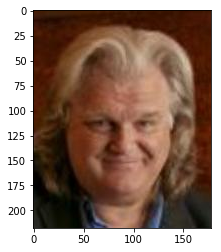

In [13]:
path = os.path.join(DATA_PATH,'028540.jpg')
img = cv2.imread(path,1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

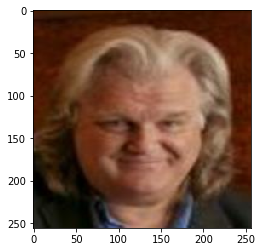

In [14]:
plt.imshow(target_data[0])